## CNN model and optimizing it with Keras tuner

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [50]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [5]:
print(tf.__version__)

2.4.1


In [7]:
fashion = keras.datasets.fashion_mnist

In [10]:
(train_i, train_l), (test_i, test_l) = fashion.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [20]:
#Normalizing the image
train_i = train_i/255
test_i =  test_i/255

9
0
0
3
0


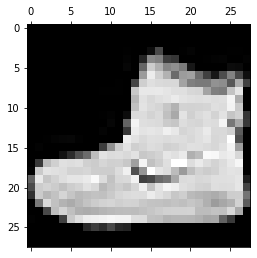

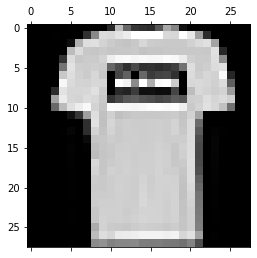

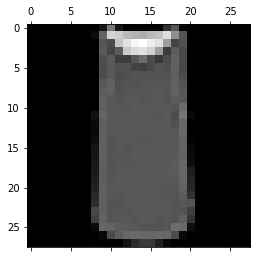

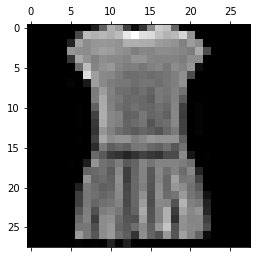

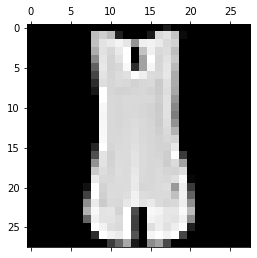

In [26]:
for i in range(5):
    plt.matshow(train_i[i],cmap='gray')
    print(train_l[i])

In [27]:
train_i[0].shape

(28, 28)

In [28]:
train_i = train_i.reshape(len(train_i),28,28,1)
test_i = test_i.reshape(len(test_i),28,28,1)


In [73]:
def build_model(hp):  
    model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    return model

In [74]:
tuner =   RandomSearch(build_model,
                    objective = 'val_accuracy',
                    max_trials = 5,
                    directory = 'project',
                    project_name ="fashion")

In [75]:
tuner.search(train_i, train_l , epochs =2, validation_split=0.1) 

Trial 5 Complete [00h 08m 10s]
val_accuracy: 0.8970000147819519

Best val_accuracy So Far: 0.9013333320617676
Total elapsed time: 00h 34m 40s
INFO:tensorflow:Oracle triggered exit


In [78]:
tuner.get_best_models(num_models=1)

In [79]:
model=tuner.get_best_models(num_models=1)[0]

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                589856    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 599,754
Trainable params: 599,754
Non-trainable params: 0
_________________________________________________________________


In [82]:
y_pred = model.predict(test_i)

In [96]:
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
pred = np.array(pred)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [100]:
print(accuracy_score(test_l, pred))
print(confusion_matrix(test_l, pred))
print(classification_report(test_l, pred))

0.8978
[[817   1  18  31   2   1 120   0  10   0]
 [  1 980   0  12   2   0   3   0   2   0]
 [ 15   0 856   9  40   1  76   0   3   0]
 [ 12   5  11 927  24   0  19   0   2   0]
 [  0   2  75  29 813   0  81   0   0   0]
 [  0   0   0   0   0 966   0  29   0   5]
 [ 91   2  69  32  57   0 737   0  12   0]
 [  0   0   0   0   0   3   0 992   0   5]
 [  2   2   2   1   5   2   2   5 979   0]
 [  0   0   0   0   0   8   0  80   1 911]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.86      0.84      1000
           3       0.89      0.93      0.91      1000
           4       0.86      0.81      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.74      0.72      1000
           7       0.90      0.99      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.

In [83]:
model.fit(test_i, test_l, epochs=10, initial_epoch=3)

Epoch 4/10
313/313 [==============================] - 10s 32ms/step - loss: 0.2635 - accuracy: 0.9049
Epoch 5/10
313/313 [==============================] - 10s 33ms/step - loss: 0.2062 - accuracy: 0.9275
Epoch 6/10
313/313 [==============================] - 11s 37ms/step - loss: 0.1486 - accuracy: 0.9502
Epoch 7/10
313/313 [==============================] - 13s 40ms/step - loss: 0.1090 - accuracy: 0.9633
Epoch 8/10
313/313 [==============================] - 12s 39ms/step - loss: 0.0916 - accuracy: 0.9675
Epoch 9/10
313/313 [==============================] - 12s 39ms/step - loss: 0.0469 - accuracy: 0.9849
Epoch 10/10
313/313 [==============================] - 12s 40ms/step - loss: 0.0341 - accuracy: 0.9917


In [102]:
new = model.predict(test_i)

pred1 = []

for i in range(len(new)):
    pred1.append(np.argmax(new[i]))
    
pred1 = np.array(pred1)

In [103]:
print(accuracy_score(test_l, pred1))
print(confusion_matrix(test_l, pred1))
print(classification_report(test_l, pred1))

0.9942
[[ 987    0    0    0    0    0   13    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0    0  963    0   26    0   11    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0    0  995    0    5    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   1    0    0    0    1    0  998    0    0    0]
 [   0    0    0    0    0    0    0  999    0    1]
 [   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0    0 1000]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       1.00      1.00      1.00      1000
           2       1.00      0.96      0.98      1000
           3       1.00      1.00      1.00      1000
           4       0.97      0.99      0.98      1000
           5       1.00      1.00      1.00      1000
           6       0.97      1.00      0.98      1000
           7       1.00      